In [280]:
import pandas as pd
import numpy as np

data = pd.read_csv("income.csv")

In [202]:
print(data.iloc[0])

age                           39
workclass              State-gov
fnlwgt                     77516
education              Bachelors
education_num                 13
marital_status     Never-married
occupation          Adm-clerical
relationship       Not-in-family
race                       White
sex                         Male
capital_gain                2174
capital_loss                   0
hours_per_week                40
native_country     United-States
income                     <=50K
Name: 0, dtype: object


## 2 Проанализировать загруженный набор данных:

### 2.1 определись признаки, в которых есть пропущенные значения, посчитать количество пропущенных значений по каждому признаку:

In [203]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

### 2.2 построить гистограмму объектов по признаку «workclass»:

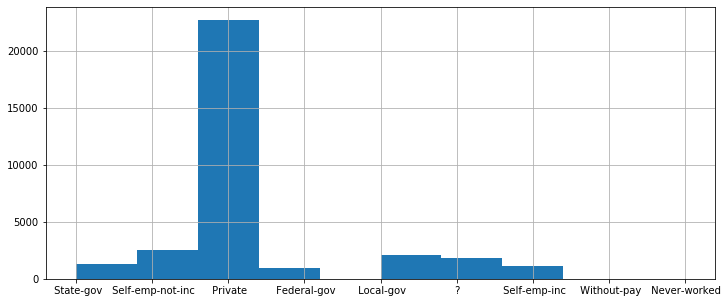

In [204]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize = (12,5))
ax = fig.gca()
data['workclass'].hist(ax=ax)

2.3 визуализировать совмещенные гистограммы объектов по признаку «income» для двух значений признака «sex» на одном графике:

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

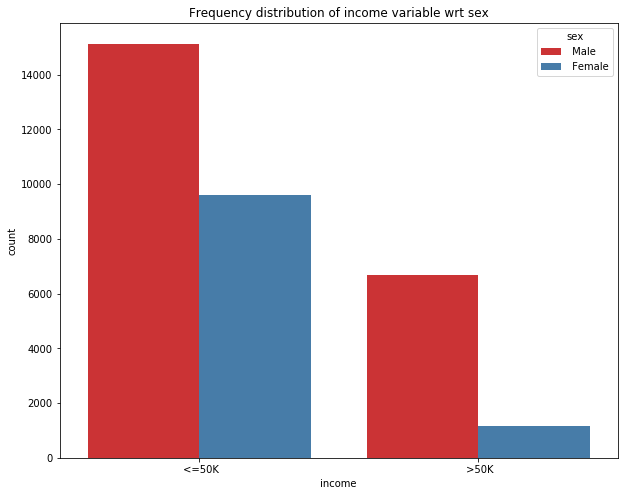

In [58]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income", hue="sex", data=data, palette="Set1")
ax.set_title("Frequency distribution of income variable wrt sex")
plt.show()

2.4 визуализировать совмещенные гистограммы объектов по признаку «income» для всех значений признака «race» на одном графике:

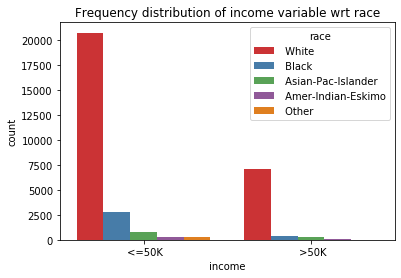

In [60]:
ax = sns.countplot(x="income", hue="race", data=data, palette="Set1")
ax.set_title("Frequency distribution of income variable wrt race")
plt.show()

2.5 визуализировать совмещенные гистограммы объектов по признаку «workclass» для двух значений признака «income» на одном графике:

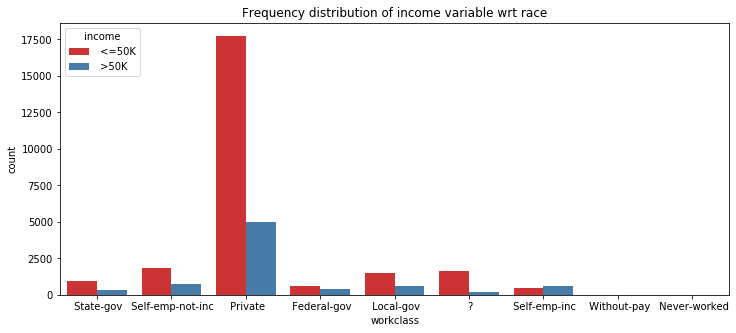

In [62]:
fig = plt.figure(figsize = (12,5))
ax = fig.gca()
ax = sns.countplot(x="workclass", hue="income", data=data, palette="Set1")
ax.set_title("Frequency distribution of income variable wrt race")
plt.show()

2.6 визуализировать совмещенные гистограммы объектов по признаку «workclass» для двух значений признака «sex» на одном графике:

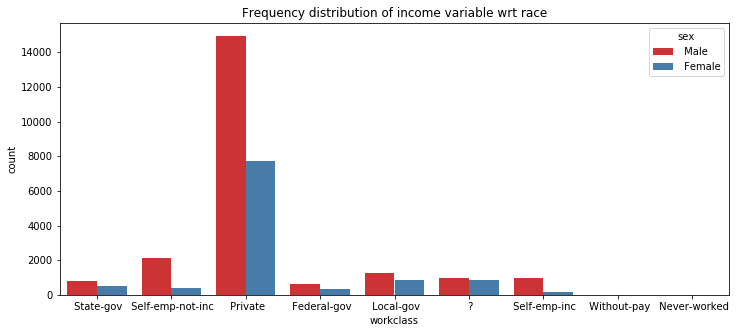

In [64]:
fig = plt.figure(figsize = (12,5))
ax = fig.gca()
ax = sns.countplot(x="workclass", hue="sex", data=data, palette="Set1")
ax.set_title("Frequency distribution of income variable wrt race")
plt.show()

2.7 визуализировать гистограмму объектов по признаку «age»:

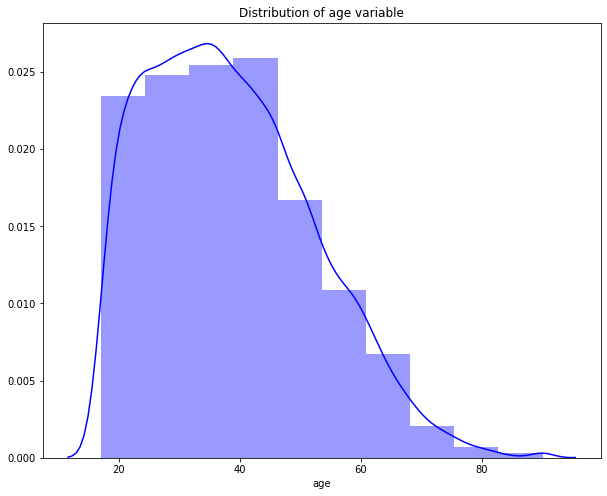

In [65]:
f, ax = plt.subplots(figsize=(10,8))
x = data['age']
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of age variable")
plt.show()

2.8 визуализировать распределение объектов по признаку «age», используя «ящик с усами»;

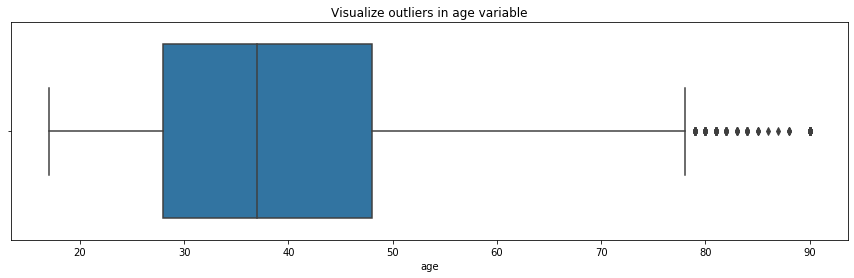

In [71]:
f, ax = plt.subplots(figsize=(15,4))
x = data['age']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in age variable")
plt.show()

2.9 визуализировать два «ящика с усами» по признаку «age» для двух значений признака «income» на одном графике;

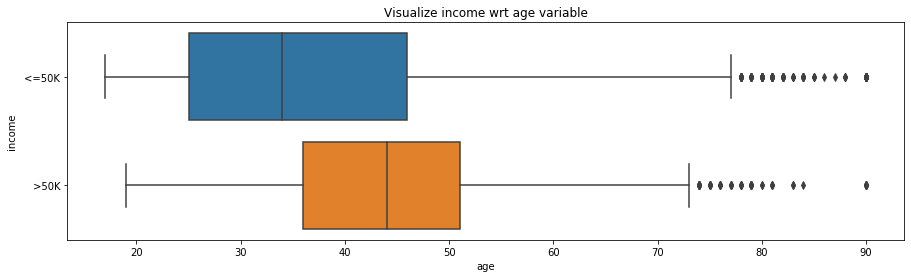

In [74]:
f, ax = plt.subplots(figsize=(15, 4))
ax = sns.boxplot(y="income", x="age", data=data)
ax.set_title("Visualize income wrt age variable")
plt.show()

2.10 визуализировать четыре «ящика с усами» по признаку «age» для двух значений признака «income» и двух значений признака «sex» на одном графике;

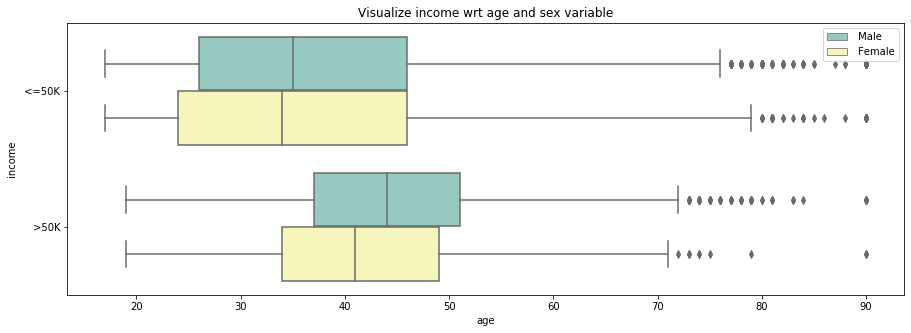

In [79]:
f, ax = plt.subplots(figsize=(15, 5))
ax = sns.boxplot(y="income", x="age", hue="sex", data=data, palette="Set3")
ax.set_title("Visualize income wrt age and sex variable")
ax.legend(loc='upper right')
plt.show()

2.11 визуализировать «ящики с усами» для каждого из значений признака «race» по признаку «аge»:

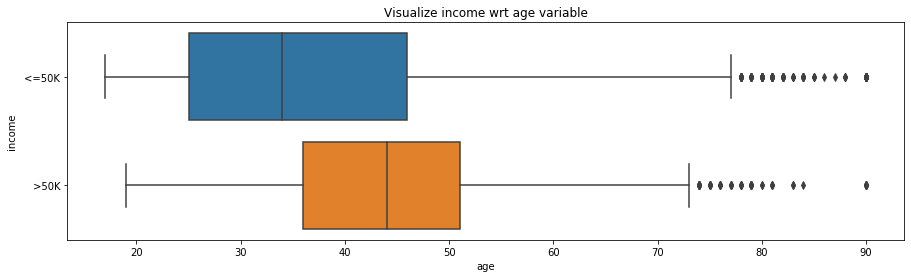

In [83]:
f, ax = plt.subplots(figsize=(15, 4))
ax = sns.boxplot(y="income", x="age", data=data)
ax.set_title("Visualize income wrt age variable")
plt.show()

2.12 визуализировать тепловую карту корреляции признаков:

In [81]:
data.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.0,-0.07665,0.03653,0.07767,0.05777,0.06876
fnlwgt,-0.07665,1.0,-0.04319,0.0004319,-0.01025,-0.01877
education_num,0.03653,-0.04319,1.0,0.1226,0.07992,0.1481
capital_gain,0.07767,0.0004319,0.1226,1.0,-0.03162,0.07841
capital_loss,0.05777,-0.01025,0.07992,-0.03162,1.0,0.05426
hours_per_week,0.06876,-0.01877,0.1481,0.07841,0.05426,1.0


2.13 если в наборе данных пропущенные значения обозначены специальным символом, замените значения в таких ячейках на тип NaN;

In [86]:
data.replace(' ?', np.NaN, inplace=True)

2.14 определить категориальные признаки в наборе данных;

In [90]:
categorical = [var for var in data.columns if data[var].dtype=='O']
data[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


2.15 определить числовые признаки в наборе данных.

In [91]:
numeric = [var for var in data.columns if data[var].dtype!='O']
data[numeric].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


## Подготовить и разделить исходный набор данных на тренировочный и тестовый наборы, в качестве целевой переменной возьмите признак «income».

In [183]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt
import numpy as np

In [281]:
le = LabelEncoder()
for c in data[categorical].columns.array[:-1]:
    le.fit(data[c])
    data[c] = le.transform(data[c])

In [282]:
X_train, X_test, y_train, y_test = train_test_split(
data[data.columns[:-1]], data['income'], random_state=0)

## Обучить модель решающего дерева для задачи классификации, построить графики зависимости F-меры на обучающей выборке и на тестовой от глубины дерева. Найти оптимальную глубину дерева, варьируя ее в выбранном диапазоне. Построить для оптимальной модели матрицу ошибок.

In [257]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [207]:
c_range = np.arange(1,20,1)
test_score, train_score = [],[]
f_train, f_test = [], []
for c in c_range:

    tree = DecisionTreeClassifier(max_depth=c, random_state=0)
    tree.fit(X_train, y_train)
    y_tr_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)
    
    f_train.append(f1_score(y_tr_pred, y_train, pos_label=" <=50K"))
    f_test.append(f1_score(y_test_pred, y_test, pos_label=" <=50K"))

Лучший результат при max_depth = 6 на тестовом наборе: 0.908


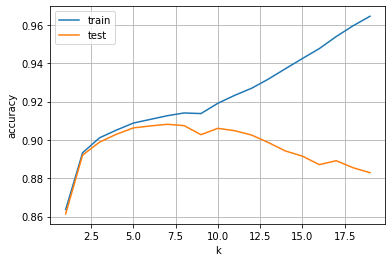

In [208]:
plt.plot(c_range, f_train)
plt.plot(c_range, f_test)
plt.legend(['train','test'])
plt.xlabel('k')
plt.ylabel('accuracy')
plt.grid('on')
ind = f_test.index(max(f_test))
print("Лучший результат при max_depth = {:.0f} на тестовом наборе: {:.3f}".format(ind, max(f_test)))

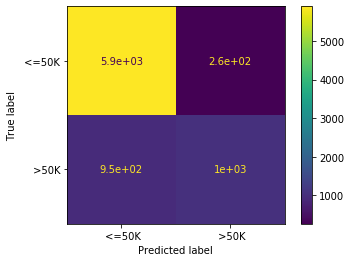

In [209]:
plot_confusion_matrix(DecisionTreeClassifier(max_depth=ind, random_state=0).fit(X_train, y_train), X_test, y_test)


# Обучить модель случайного леса для задачи классификации, построить графики зависимости F-меры на обучающей выборке и на тестовой от количества деревьев в композиции. Найдите оптимальное количество деревьев в композиции, варьируя их в выбранном диапазоне. Построить для оптимальной модели матрицу ошибок.

In [151]:
from sklearn.ensemble import RandomForestClassifier

In [210]:
c_range = np.arange(1,20,1)
test_score, train_score = [],[]
f_train, f_test = [], []
for c in c_range:

    tree = RandomForestClassifier(n_estimators=c, random_state=0)
    tree.fit(X_train, y_train)
    y_tr_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)
    
    f_train.append(f1_score(y_tr_pred, y_train, pos_label=" <=50K"))
    f_test.append(f1_score(y_test_pred, y_test, pos_label=" <=50K"))

Лучший результат при max_depth = 17 на тестовом наборе: 0.905


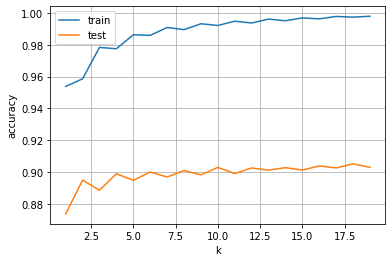

In [211]:
plt.plot(c_range, f_train)
plt.plot(c_range, f_test)
plt.legend(['train','test'])
plt.xlabel('k')
plt.ylabel('accuracy')
plt.grid('on')
ind = f_test.index(max(f_test))
print("Лучший результат при max_depth = {:.0f} на тестовом наборе: {:.3f}".format(ind, max(f_test)))

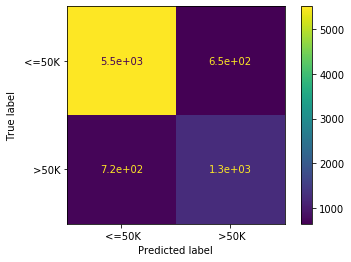

In [212]:
plot_confusion_matrix(DecisionTreeClassifier(max_depth=ind, random_state=0).fit(X_train, y_train), X_test, y_test)


# Обучить модель градиентного бустинга для классификации, построить графики зависимости F-меры на обучающей выборке и на тестовой от количества деревьев в композиции. Найдите оптимальное количество деревьев в композиции, варьируя их в выбранном диапазоне. Построить для оптимальной модели матрицу ошибок.

In [163]:
from catboost import CatBoostClassifier

In [213]:
c_range = np.arange(1,20,1)
test_score, train_score = [],[]
f_train, f_test = [], []
for c in c_range:

    tree = RandomForestClassifier(n_estimators=c, random_state=0)
    tree.fit(X_train, y_train)
    y_tr_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)
    
    f_train.append(f1_score(y_tr_pred, y_train, pos_label=" <=50K"))
    f_test.append(f1_score(y_test_pred, y_test, pos_label=" <=50K"))

Лучший результат при max_depth = 17 на тестовом наборе: 0.905


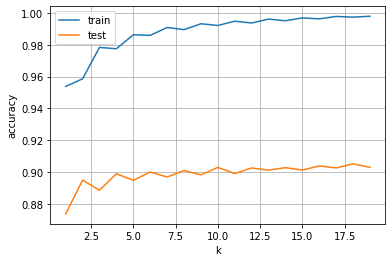

In [214]:
plt.plot(c_range, f_train)
plt.plot(c_range, f_test)
plt.legend(['train','test'])
plt.xlabel('k')
plt.ylabel('accuracy')
plt.grid('on')
ind = f_test.index(max(f_test))
print("Лучший результат при max_depth = {:.0f} на тестовом наборе: {:.3f}".format(ind, max(f_test)))

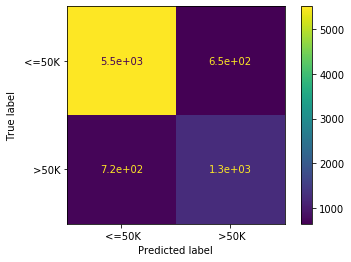

In [215]:
plot_confusion_matrix(DecisionTreeClassifier(max_depth=ind, random_state=0).fit(X_train, y_train), X_test, y_test)


# Обучение модели многослойного перцепторна:

## подготовить данные для обучения нейросети;

In [283]:
data['workclass'].fillna(data['workclass'].mode()[0], inplace=True)
data['occupation'].fillna(data['occupation'].mode()[0], inplace=True)
data['native_country'].fillna(data['native_country'].mode()[0], inplace=True)

In [284]:
X_train = X_train.to_numpy(dtype=('float32'))
X_test = X_test.to_numpy(dtype=('float32'))

In [285]:
from tensorflow.python.keras.utils import np_utils

y_test1 = le.fit(y_test).transform(y_test)
y_train = np_utils.to_categorical(le.fit(y_train).transform(y_train), 2)
y_test = np_utils.to_categorical(le.fit(y_test).transform(y_test), 2)

## обучить модель многослойного перцептрона для задачи классификации с оптимальными параметрами, построить графики зависимости F-меры на обучающей выборке и на тестовой от количества эпох обучения. Определите оптимальное количество эпох обучения и архитектуру нейросети. Построить для оптимальной модели матрицу ошибок.

In [223]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.python.keras.utils import np_utils

In [293]:
NB_CLASSES = y_train.shape[1]
INPUT_SHAPE = (X_train.shape[1],)
model = Sequential()
model.add(Dense(32, input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(8))
model.add(Activation('relu'))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                480       
_________________________________________________________________
activation_4 (Activation)    (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
activation_5 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
activation_6 (Activation)    (None, 8)                

In [294]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['Precision', 'Recall'])

In [295]:
EPOCHS = 30
history = model.fit(X_train, y_train,
batch_size = 32, epochs = EPOCHS,
verbose = 1, validation_data = (X_test, y_test))

Train on 24420 samples, validate on 8141 samples
Epoch 1/30
24420/24420 [==============================] - 3s 124us/sample - loss: 7.6890 - precision_4: 0.5000 - recall_4: 0.5000 - val_loss: 3.7442 - val_precision_4: 0.7565 - val_recall_4: 0.7565
Epoch 2/30
24420/24420 [==============================] - 2s 69us/sample - loss: 3.7050 - precision_4: 0.7591 - recall_4: 0.7591 - val_loss: 3.7442 - val_precision_4: 0.7565 - val_recall_4: 0.7565
Epoch 3/30
24420/24420 [==============================] - 2s 92us/sample - loss: 3.7104 - precision_4: 0.7587 - recall_4: 0.7587 - val_loss: 3.7442 - val_precision_4: 0.7565 - val_recall_4: 0.7565
Epoch 4/30
24420/24420 [==============================] - 3s 128us/sample - loss: 3.6898 - precision_4: 0.7601 - recall_4: 0.7601 - val_loss: 3.7442 - val_precision_4: 0.7565 - val_recall_4: 0.7565
Epoch 5/30
24420/24420 [==============================] - 2s 88us/sample - loss: 3.6898 - precision_4: 0.7601 - recall_4: 0.7601 - val_loss: 3.7442 - val_precisi

In [298]:
f1_score_list_train = []
f1_score_list_test = []
for i in range(EPOCHS):

    f1_score_list_train.append(2*history.history['precision_4'][i]*history.history['recall_4'][i]/(history.history['precision_4'][i]+history.history['recall_4'][i]))
    f1_score_list_test.append(2*history.history['val_precision_4'][i]*history.history['val_recall_4'][i]/(history.history['val_precision_4'][i]+history.history['val_recall_4'][i]))
    
print(f1_score_list_test)

[0.7565409541130066, 0.7565409541130066, 0.7565409541130066, 0.7565409541130066, 0.7565409541130066, 0.7565409541130066, 0.7565409541130066, 0.7565409541130066, 0.7565409541130066, 0.7565409541130066, 0.7565409541130066, 0.7565409541130066, 0.7565409541130066, 0.7565409541130066, 0.7565409541130066, 0.7565409541130066, 0.7565409541130066, 0.7565409541130066, 0.7565409541130066, 0.7565409541130066, 0.7565409541130066, 0.7565409541130066, 0.7565409541130066, 0.7565409541130066, 0.7565409541130066, 0.7565409541130066, 0.7565409541130066, 0.7565409541130066, 0.7565409541130066, 0.7565409541130066]


Лучший результат при max_depth = 17 на тестовом наборе: 0.905


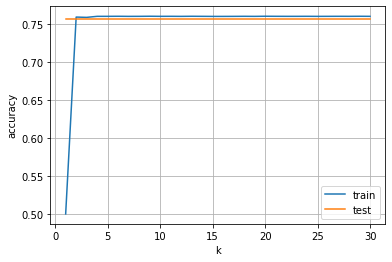

In [300]:
plt.plot(range(1,EPOCHS+1), f1_score_list_train)
plt.plot(range(1, EPOCHS+1), f1_score_list_test)
plt.legend(['train','test'])
plt.xlabel('k')
plt.ylabel('accuracy')
plt.grid('on')
ind = f_test.index(max(f_test))
print("Лучший результат при max_depth = {:.0f} на тестовом наборе: {:.3f}".format(ind, max(f_test)))

[0 0 0 ... 0 0 0]
[[6159    0]
 [1982    0]]


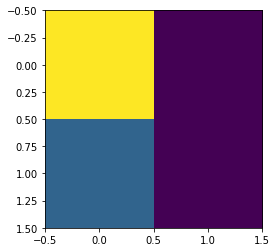

In [302]:
y_pred = model.predict_classes(X_test)

print(y_pred)

cm=confusion_matrix(y_test1,y_pred)
print(cm)
plt.imshow(cm)

11493376/11490434 [==============================] - 2s 0us/step


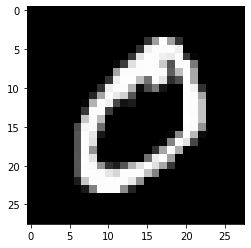

In [304]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# pick a sample to plot
sample = 1
image = X_train[sample]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [314]:
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

In [315]:
from sklearn.metrics import f1_score
f1_score(y_test, model.predict(X_test), average='micro')

ValueError: Error when checking input: expected dense_4_input to have shape (14,) but got array with shape (784,)

In [308]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [309]:
model.compile(loss='categorical_crossentropy',
optimizer = 'adam',
metrics=['Precision', 'Recall'])

In [310]:
import seaborn as sns
confusion_matrix_ = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(data = confusion_matrix_, columns = ['0', '1', '2', '3', '4',
'5', '6', '7', '8', '9'], index = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
ax = sns.heatmap(cm, annot=True, fmt="d")

ValueError: Found input variables with inconsistent numbers of samples: [10000, 8141]